In [3]:
import pandas as pd


In [4]:

# Define the file paths for each dataset
pems_04_path ='data/PEMS04/PEMS04.csv'
pems_07_path = 'data/PEMS07/PEMS07.csv'
pems_08_path = 'data/PEMS08/PEMS08.csv'


df_pems_04 = pd.read_csv(pems_04_path)
df_pems_07 = pd.read_csv(pems_07_path)
df_pems_08 = pd.read_csv(pems_08_path)

combined_df = pd.concat([df_pems_04, df_pems_07, df_pems_08], ignore_index=True)

print(combined_df.head())

   from   to   cost
0    73    5  352.6
1     5  154  347.2
2   154  263  392.9
3   263   56  440.8
4    56   96  374.6


In [5]:

combined_df.to_csv('pems.csv', index=False)


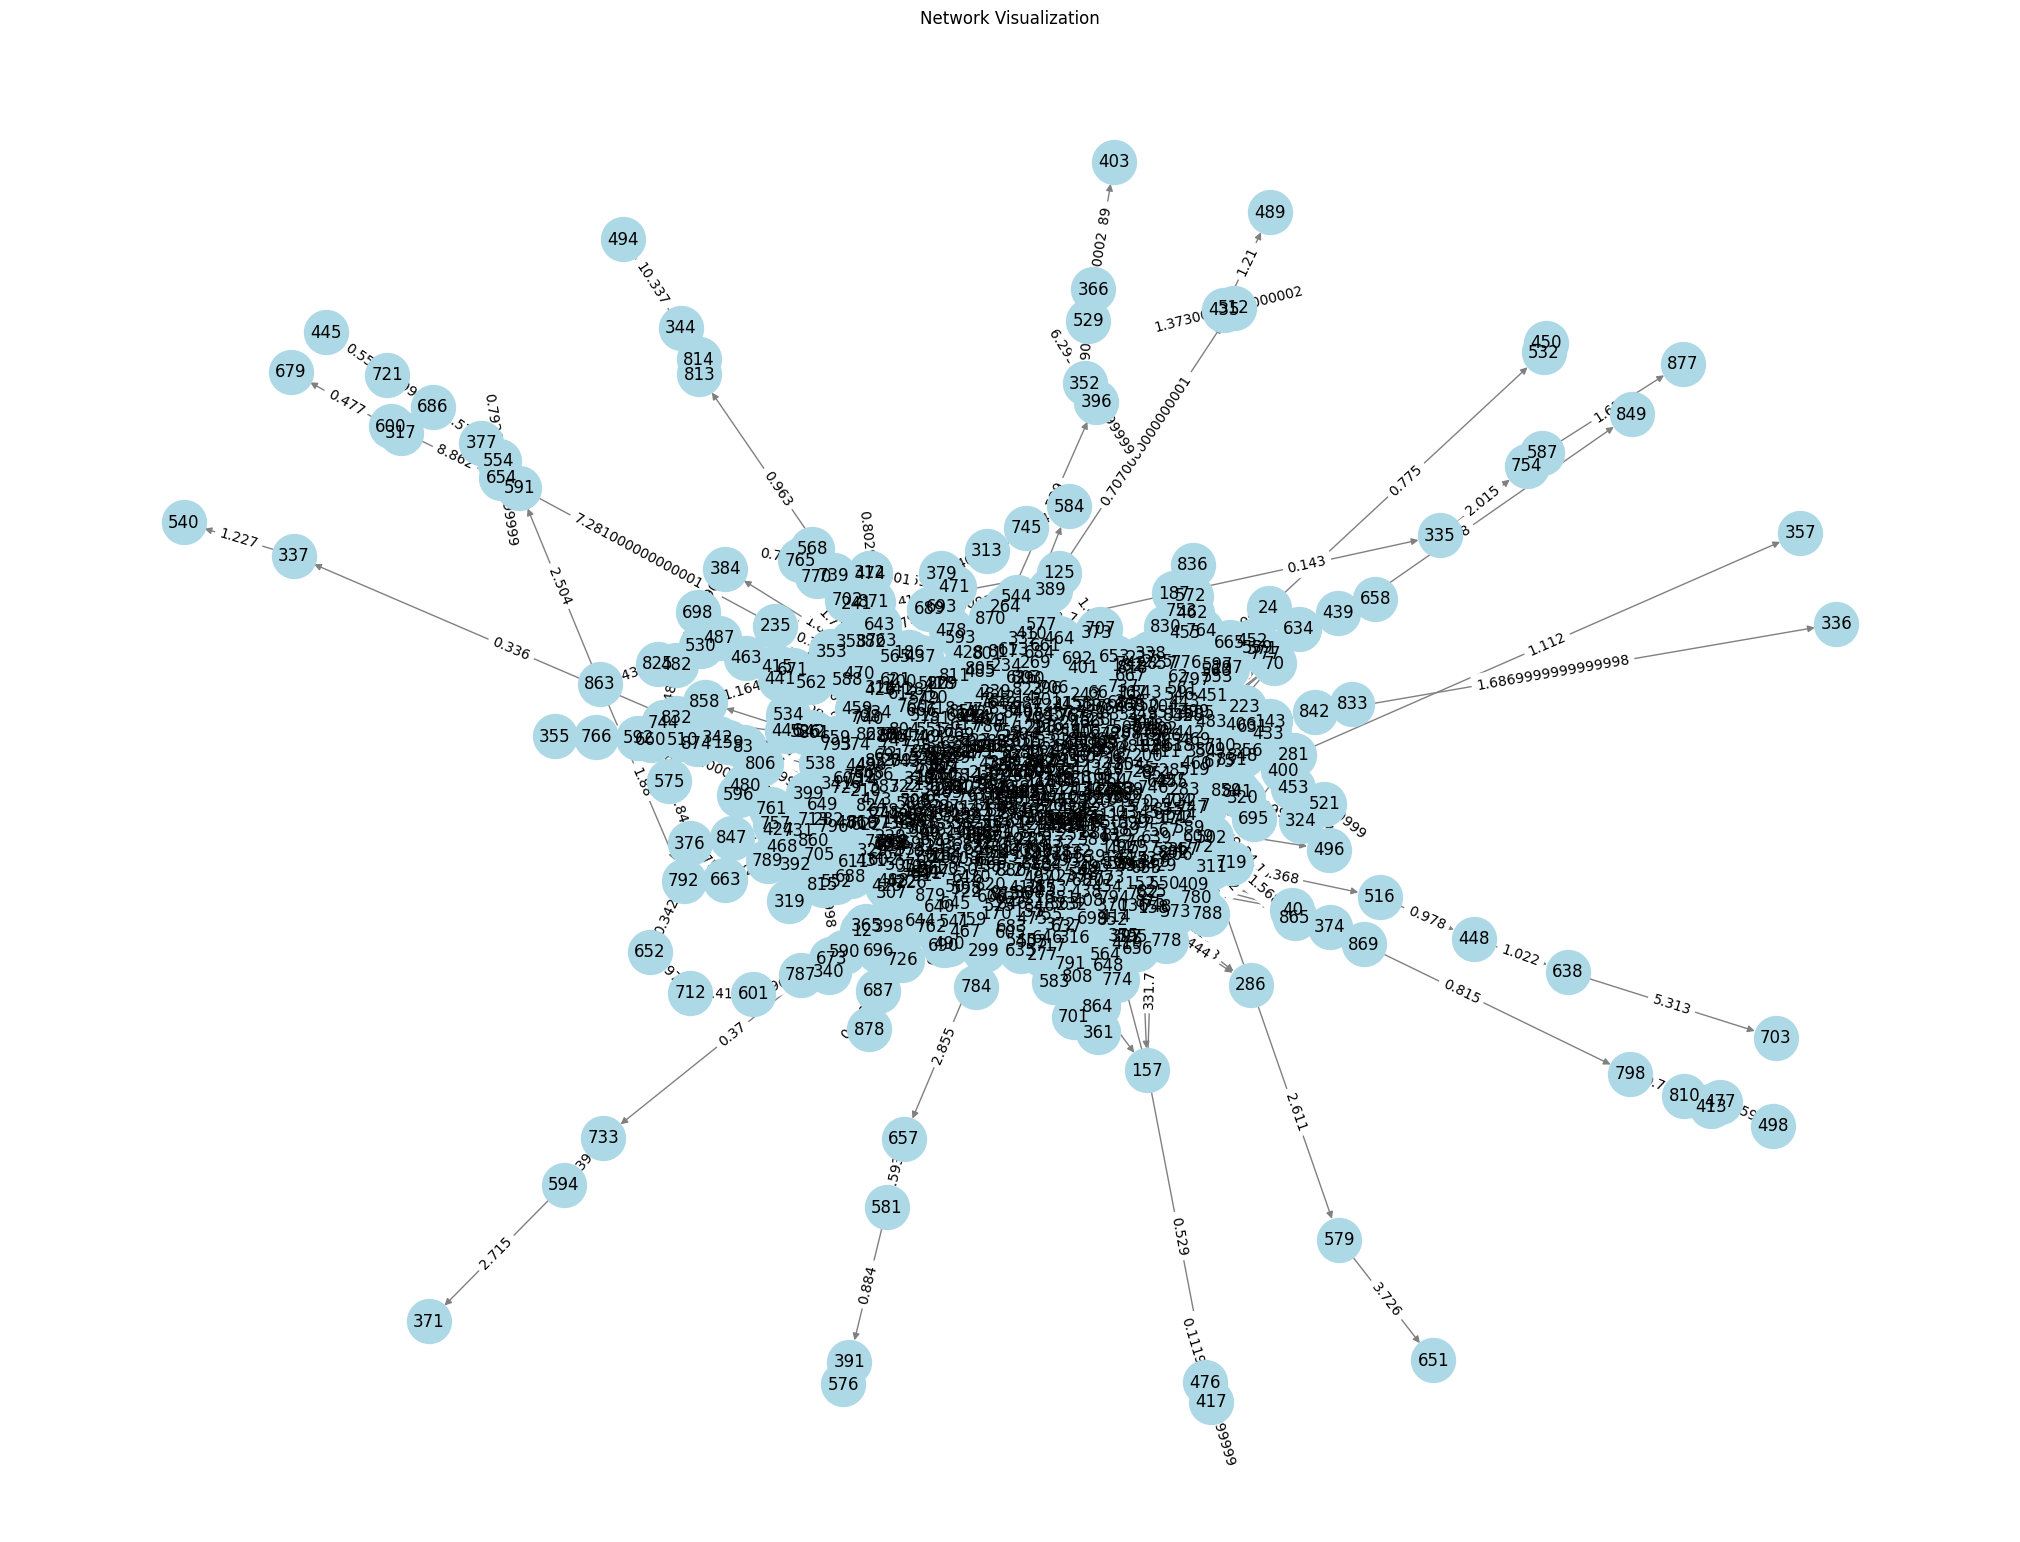

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv('./pems.csv')

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

pos = nx.spring_layout(G) 

plt.figure(figsize=(20, 15))

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Network Visualization')
plt.show()


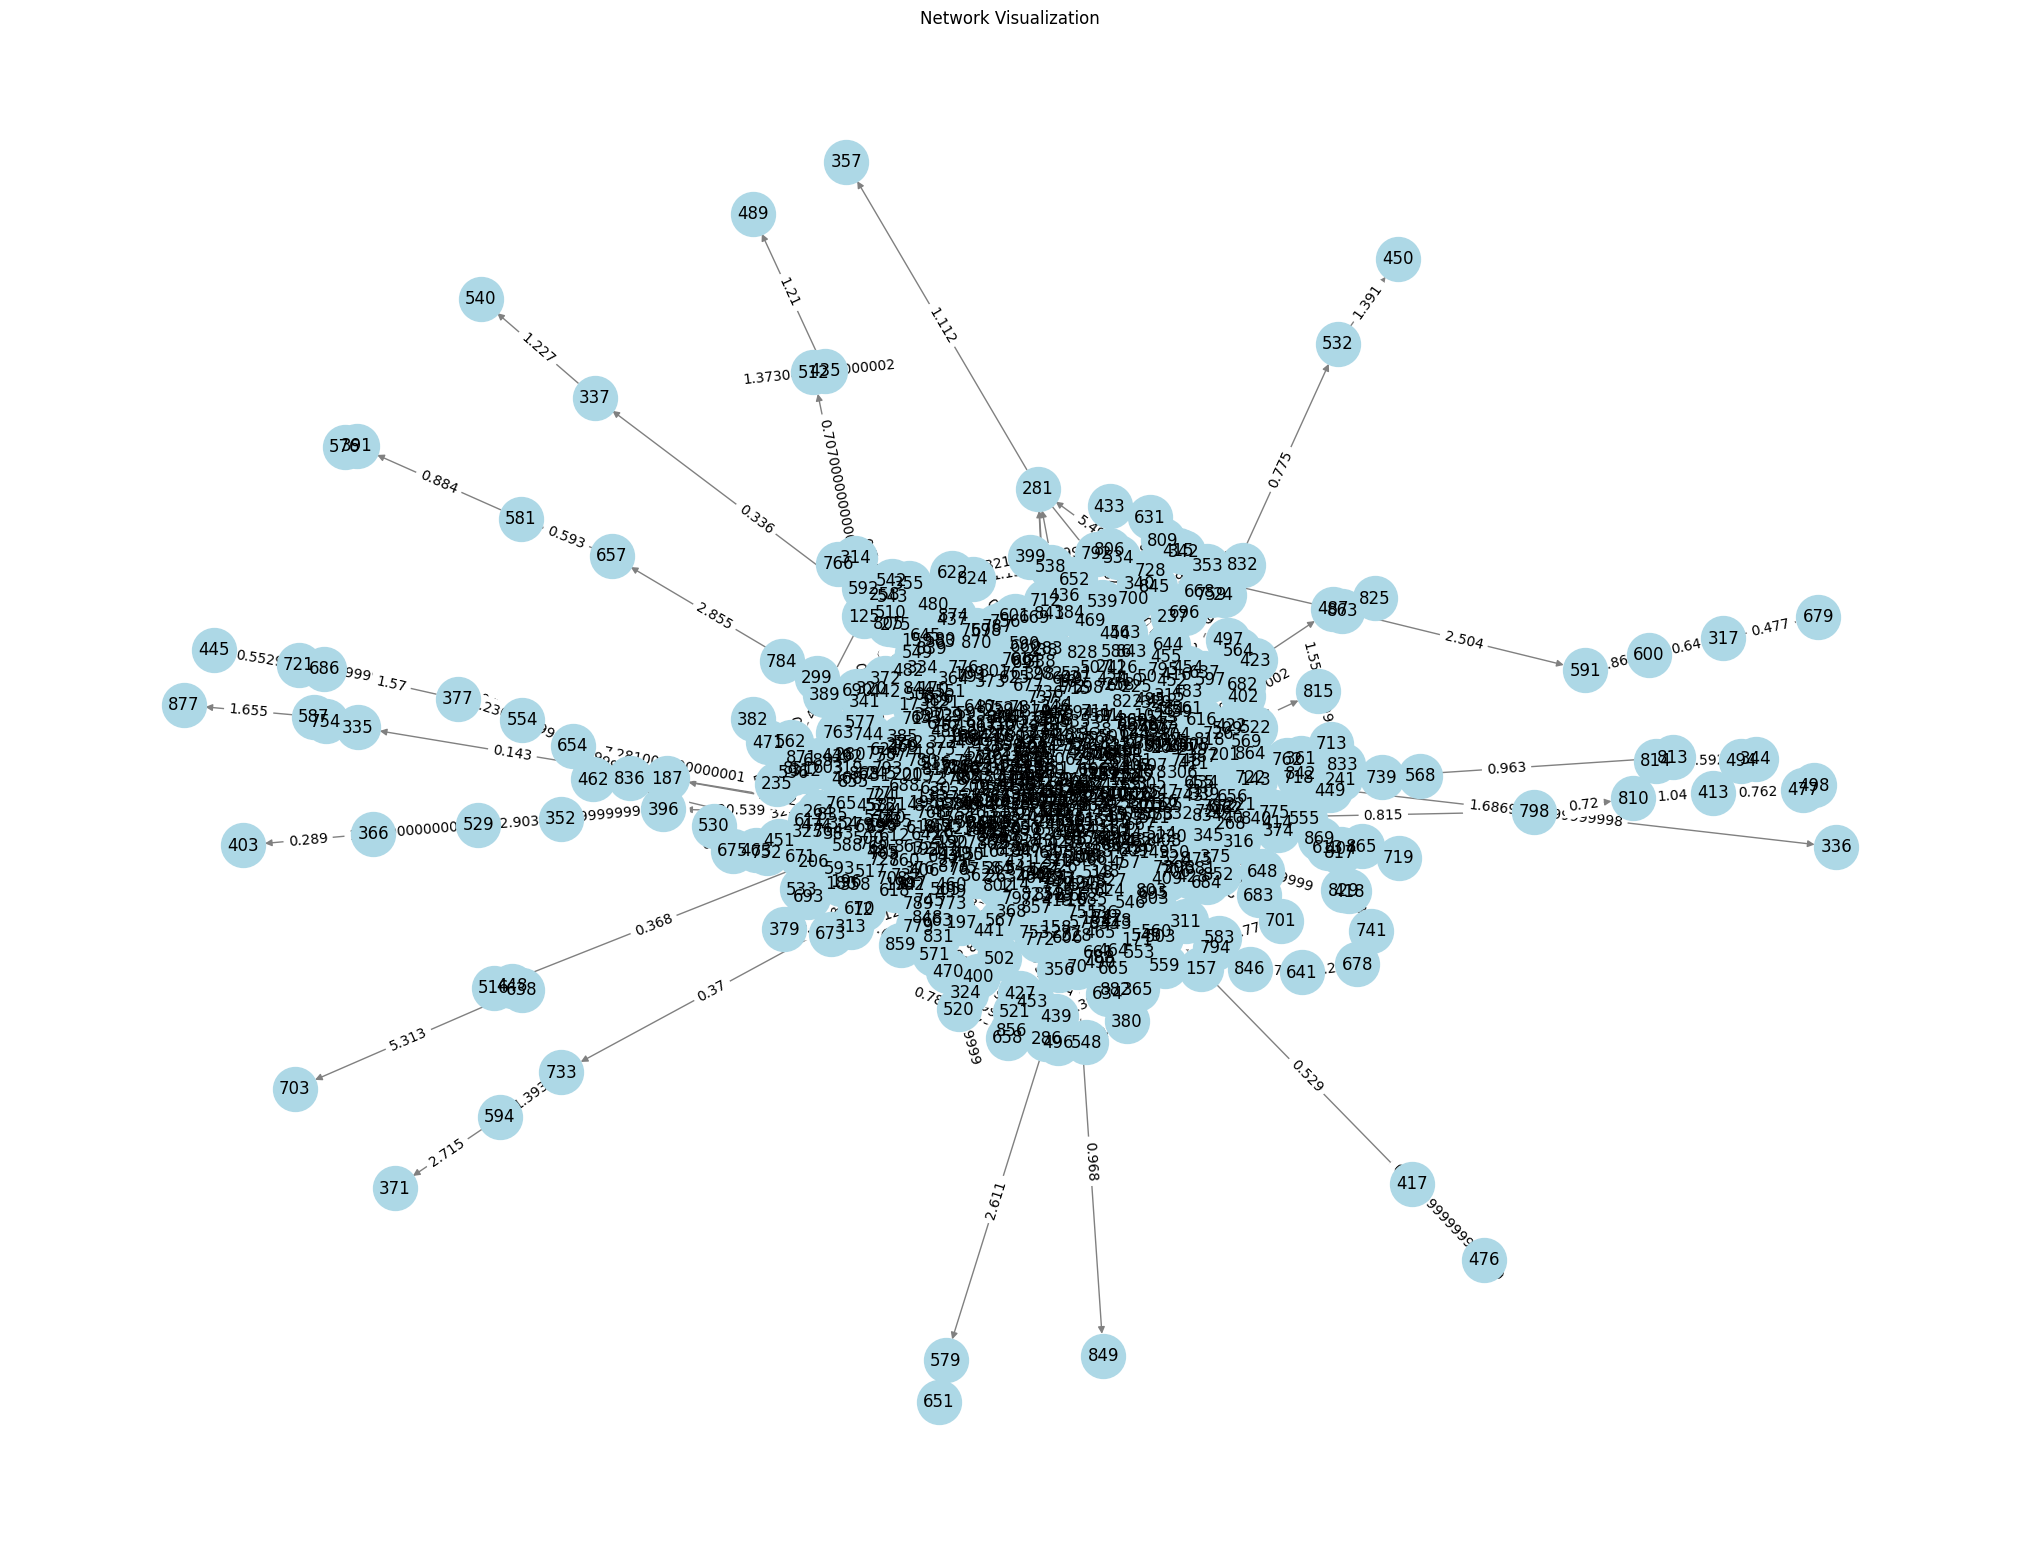

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv('./pems_unique_pairs.csv')

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

pos = nx.spring_layout(G) 

plt.figure(figsize=(20, 15))

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Network Visualization')
plt.show()


High Cost Edges: [(73, 5), (73, 71), (5, 154), (5, 18), (154, 263), (154, 143), (263, 56), (56, 96), (56, 57), (96, 42), (96, 94), (42, 58), (42, 12), (58, 95), (58, 67), (95, 72), (95, 98), (72, 271), (72, 159), (72, 162), (271, 68), (68, 69), (134, 107), (134, 136), (107, 130), (107, 105), (107, 46), (130, 129), (130, 106), (129, 156), (227, 167), (167, 298), (167, 70), (298, 209), (209, 146), (209, 104), (146, 170), (146, 85), (146, 92), (170, 173), (173, 117), (117, 0), (117, 125), (0, 92), (92, 243), (92, 37), (92, 85), (92, 147), (243, 62), (62, 111), (62, 70), (203, 80), (80, 97), (80, 79), (97, 28), (97, 101), (28, 57), (57, 55), (57, 242), (57, 243), (57, 68), (55, 223), (55, 53), (223, 143), (143, 269), (143, 133), (269, 290), (290, 110), (110, 121), (121, 299), (121, 140), (299, 293), (293, 148), (148, 150), (148, 97), (150, 152), (150, 61), (152, 157), (98, 70), (98, 119), (70, 255), (70, 119), (70, 59), (128, 131), (131, 132), (132, 133), (132, 134), (133, 163), (242, 18),

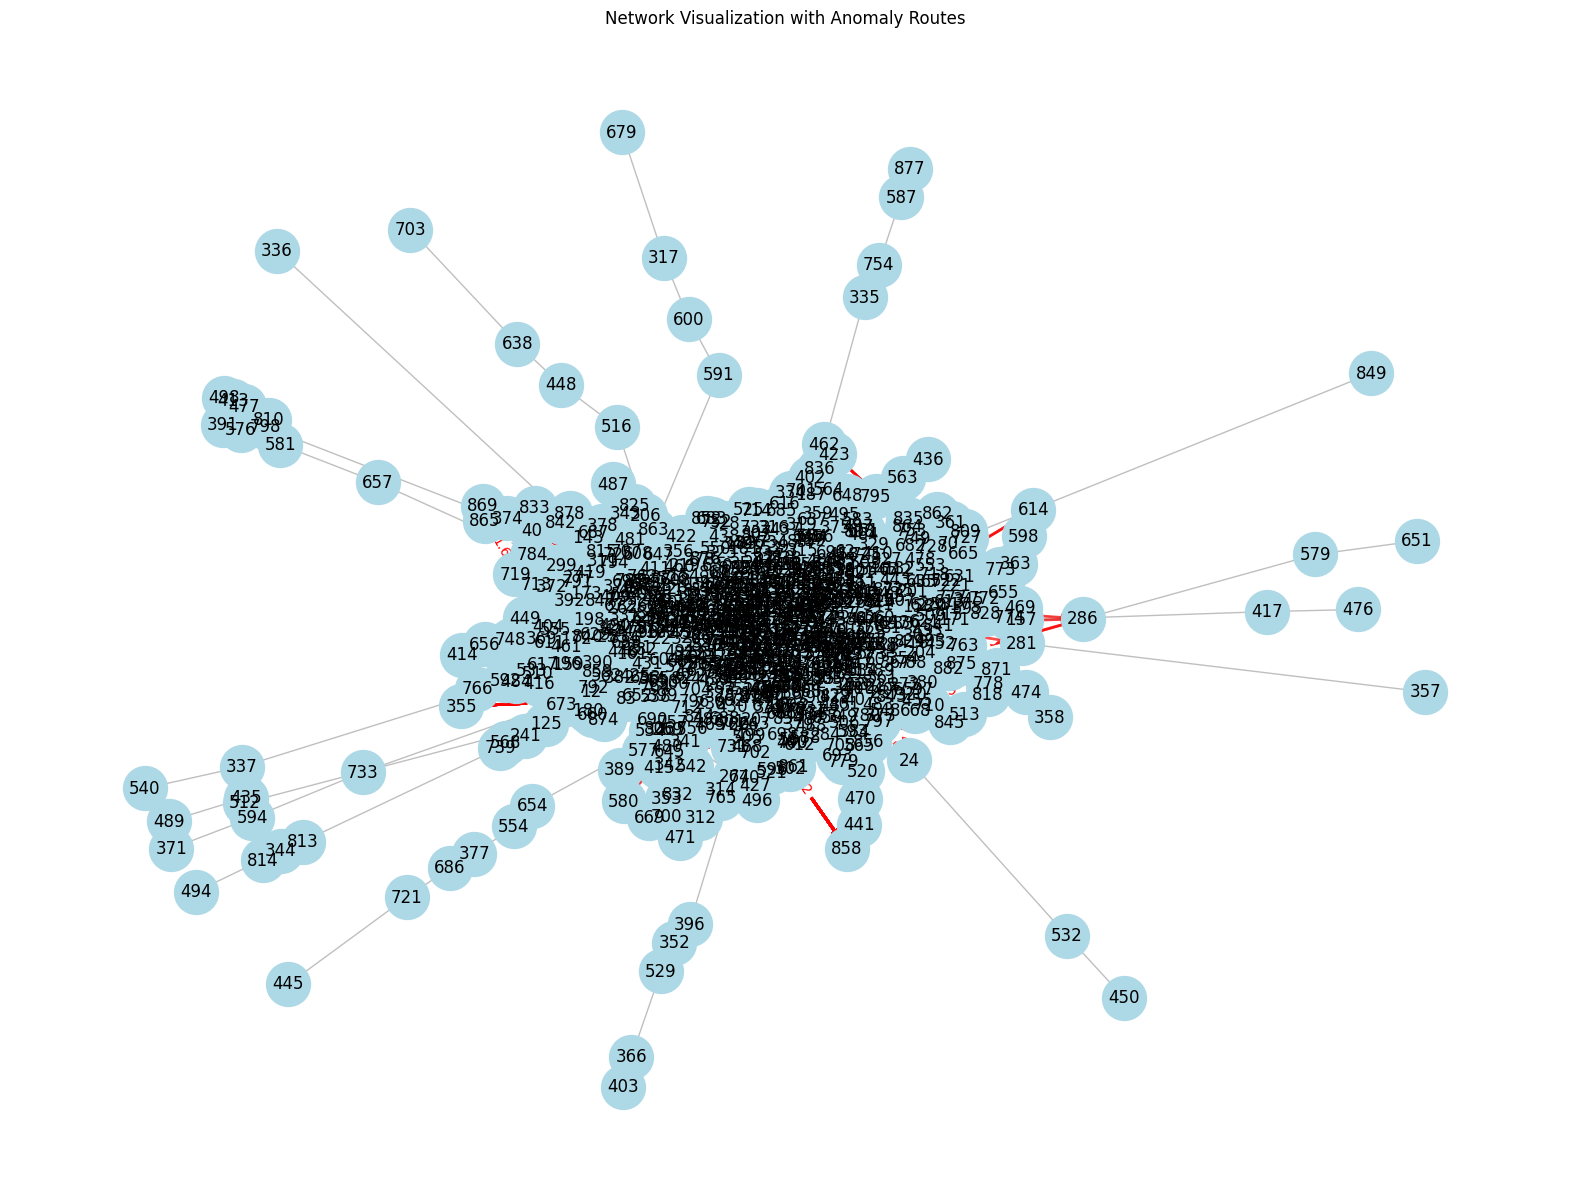

Anomaly Routes:
Route 1: 73 -> 5
Route 2: 73 -> 488 -> 790 -> 386 -> 723 -> 84 -> 385 -> 236 -> 276 -> 180 -> 859 -> 324 -> 453 -> 356 -> 328 -> 685 -> 466 -> 176 -> 823 -> 122 -> 526 -> 574 -> 743 -> 628 -> 302 -> 511 -> 20 -> 101 -> 273 -> 818 -> 513 -> 710 -> 843 -> 253 -> 845 -> 668 -> 237 -> 586 -> 627 -> 447 -> 37 -> 781 -> 222 -> 734 -> 71
Route 3: 5 -> 154
Route 4: 5 -> 18
Route 5: 154 -> 263
Route 6: 154 -> 192 -> 52 -> 835 -> 727 -> 773 -> 772 -> 171 -> 303 -> 528 -> 310 -> 178 -> 407 -> 247 -> 605 -> 308 -> 2 -> 0 -> 475 -> 730 -> 285 -> 318 -> 73 -> 488 -> 790 -> 386 -> 723 -> 84 -> 385 -> 236 -> 276 -> 292 -> 145 -> 557 -> 816 -> 48 -> 507 -> 711 -> 260 -> 329 -> 360 -> 33 -> 221 -> 718 -> 775 -> 268 -> 817 -> 418 -> 741 -> 678 -> 641 -> 846 -> 794 -> 311 -> 695 -> 7 -> 343 -> 707 -> 544 -> 689 -> 382 -> 562 -> 446 -> 793 -> 72 -> 530 -> 463 -> 671 -> 588 -> 612 -> 854 -> 850 -> 259 -> 786 -> 9 -> 265 -> 365 -> 490 -> 277 -> 419 -> 370 -> 42 -> 537 -> 13 -> 39 -> 359 -> 52

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


df = pd.read_csv('./pems.csv')

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

# anomalies as cost > 1.5 * mean_cost
edge_costs = nx.get_edge_attributes(G, 'cost')
mean_cost = sum(edge_costs.values()) / len(edge_costs)
high_cost_edges = [(source, target) for (source, target), cost in edge_costs.items() if cost > 1.5 * mean_cost]
print("High Cost Edges:", high_cost_edges)


plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G) 

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')

nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

anomaly_routes = []
for edge in high_cost_edges:
    anomaly_route = nx.shortest_path(G, edge[0], edge[1], weight='cost')
    anomaly_routes.append(anomaly_route)
    nx.draw_networkx_edges(G, pos, edgelist=[(anomaly_route[i], anomaly_route[i+1]) for i in range(len(anomaly_route)-1)], width=2.0, alpha=0.7, edge_color='red')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(anomaly_route[i], anomaly_route[i+1]): f"{edge_costs[(anomaly_route[i], anomaly_route[i+1])]:.1f}" for i in range(len(anomaly_route)-1)}, font_color='red')

plt.title('Network Visualization with Anomaly Routes')
plt.axis('off')
plt.show()

print("Anomaly Routes:")
for i, route in enumerate(anomaly_routes):
    print(f"Route {i+1}: {' -> '.join(map(str, route))}")


High Cost Edges: [(73, 5), (73, 71), (5, 154), (5, 18), (154, 263), (154, 143), (263, 56), (56, 96), (56, 57), (96, 42), (96, 94), (42, 58), (42, 12), (58, 95), (58, 67), (95, 72), (95, 98), (72, 271), (72, 159), (72, 162), (271, 68), (68, 69), (134, 107), (134, 136), (107, 130), (107, 105), (107, 46), (130, 129), (130, 106), (129, 156), (227, 167), (167, 298), (167, 70), (298, 209), (209, 146), (209, 104), (146, 170), (146, 85), (146, 92), (170, 173), (173, 117), (117, 0), (117, 125), (0, 92), (92, 243), (92, 37), (92, 85), (92, 147), (243, 62), (62, 111), (62, 70), (203, 80), (80, 97), (80, 79), (97, 28), (97, 101), (28, 57), (57, 55), (57, 242), (57, 243), (57, 68), (55, 223), (55, 53), (223, 143), (143, 269), (143, 133), (269, 290), (290, 110), (110, 121), (121, 299), (121, 140), (299, 293), (293, 148), (148, 150), (148, 97), (150, 152), (150, 61), (152, 157), (98, 70), (98, 119), (70, 255), (70, 119), (70, 59), (128, 131), (131, 132), (132, 133), (132, 134), (133, 163), (242, 18),

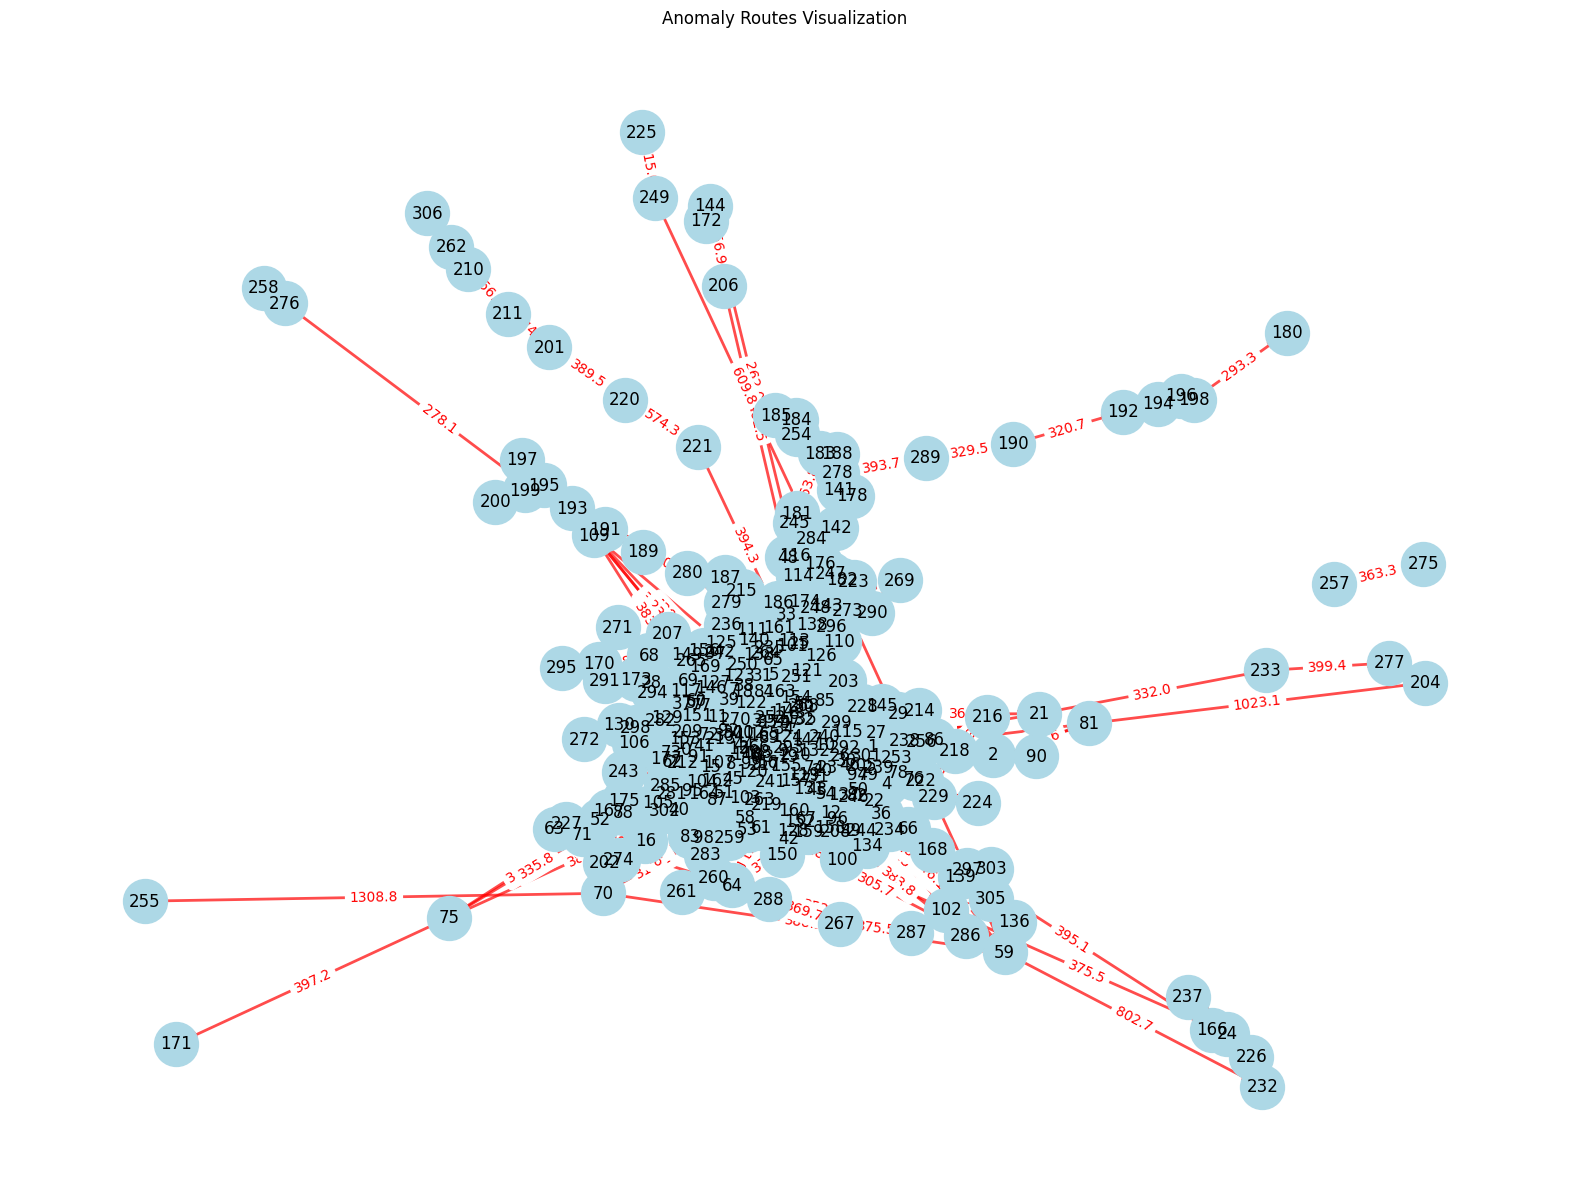

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv('./pems.csv')

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

edge_costs = nx.get_edge_attributes(G, 'cost')
mean_cost = sum(edge_costs.values()) / len(edge_costs)
high_cost_edges = [(source, target) for (source, target), cost in edge_costs.items() if cost > 1.5 * mean_cost]
print("High Cost Edges:", high_cost_edges)

anomaly_graph = nx.DiGraph(high_cost_edges)

plt.figure(figsize=(20, 15))

pos = nx.spring_layout(anomaly_graph)

nx.draw_networkx_edges(anomaly_graph, pos, width=2.0, alpha=0.7, edge_color='red')

nx.draw_networkx_nodes(anomaly_graph, pos, node_size=1000, node_color='lightblue')

nx.draw_networkx_labels(anomaly_graph, pos, font_size=12, font_color='black')

edge_labels = {edge: edge_costs[edge] for edge in high_cost_edges}
nx.draw_networkx_edge_labels(anomaly_graph, pos, edge_labels=edge_labels, font_color='red')

plt.title('Anomaly Routes Visualization')
plt.axis('off')
plt.show()


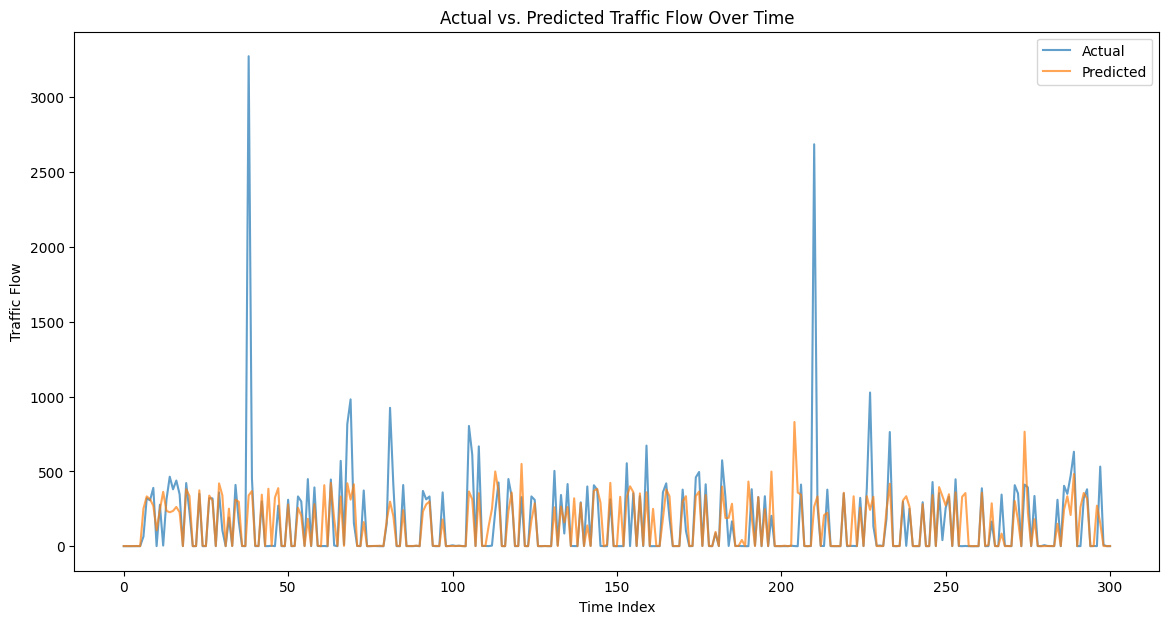

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('pems.csv')

X = data[['from', 'to']]
y = data['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

time_index = range(len(y_test))

plt.figure(figsize=(14, 7))
plt.plot(time_index, y_test, label='Actual', alpha=0.7)
plt.plot(time_index, y_pred, label='Predicted', alpha=0.7)
plt.xlabel('Time Index')
plt.ylabel('Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow Over Time')
plt.legend()
plt.show()


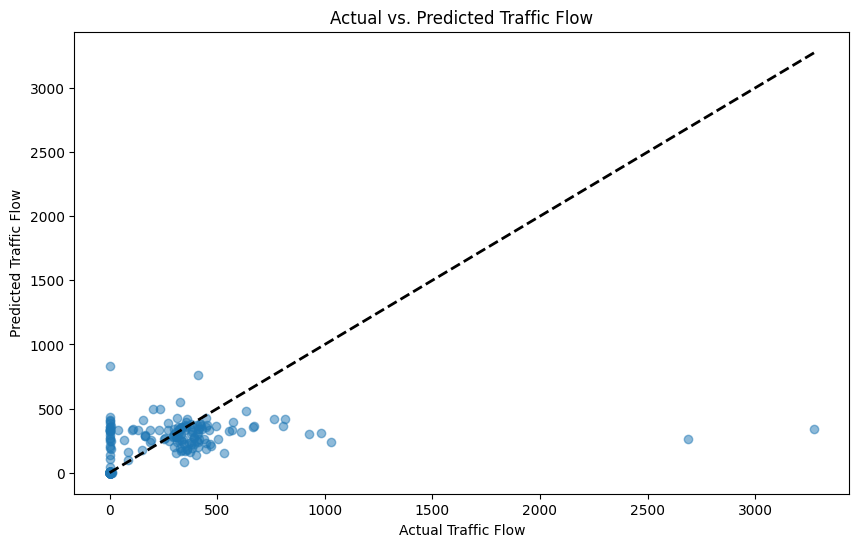

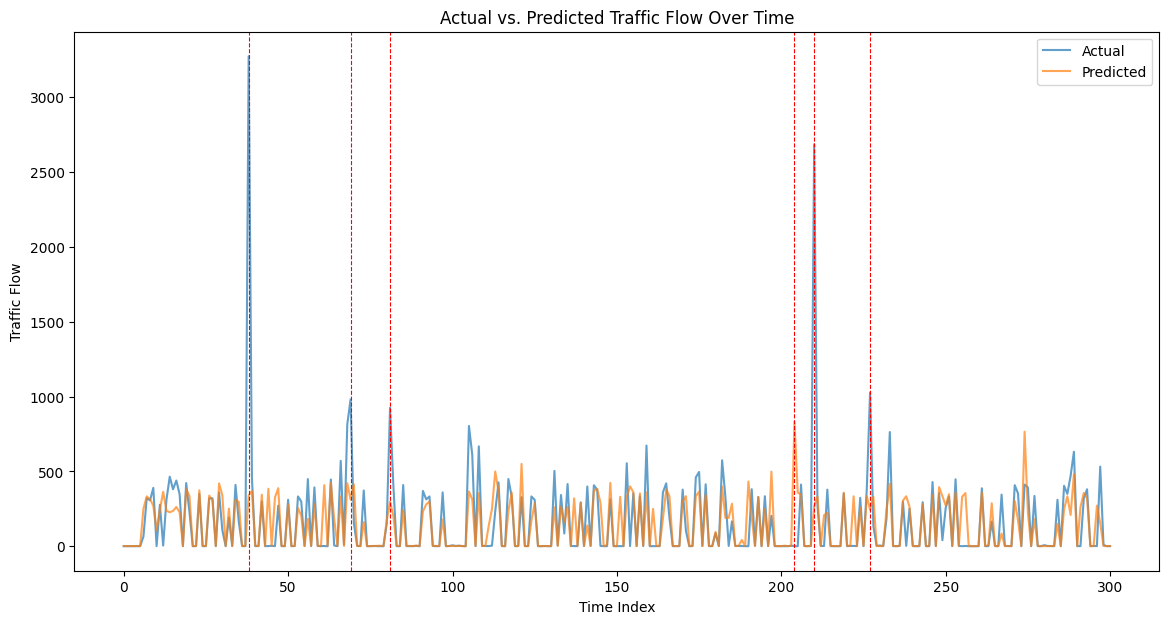

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('pems.csv')

X = data[['from', 'to']]
y = data['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

errors = abs(y_test - y_pred)

threshold = errors.mean() + 2 * errors.std()

anomalies = errors > threshold

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Traffic Flow')
plt.ylabel('Predicted Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

time_index = range(len(y_test))

plt.figure(figsize=(14, 7))
plt.plot(time_index, y_test, label='Actual', alpha=0.7)
plt.plot(time_index, y_pred, label='Predicted', alpha=0.7)

for i, is_anomaly in enumerate(anomalies):
    if is_anomaly:
        plt.axvline(x=i, color='red', linestyle='--', linewidth=0.8)

plt.xlabel('Time Index')
plt.ylabel('Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow Over Time')
plt.legend()
plt.show()

